In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
cpu_eval_count = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000, 2000000, 5000000, 10000000]

In [3]:
def read_file(fpath):
    s = ""
    with open(fpath, 'r') as f:
        s = f.read()
        f.close()
    return s

In [94]:
def read_cache_miss_record(record_type):
    dfs = []
    for c in cpu_eval_count:
        df = pd.DataFrame(columns = ['percent', 'misses', 'queries_count', 'total_nodes', 'search_misses'])
        filename = "%s-%d.log" % (record_type, c)
        record = read_file(filename).split('\n')
        for r in record:
            if r == "":
                continue
            percent = float(r.split(' ')[0]) * 100
            misses_count = int(float(r.split(' ')[1].strip()))
            print("precent = %lf, misses = %d\n" % (percent, misses_count))
            df.loc[len(df)] = [percent, misses_count, c, 2000000, percent * misses_count / 100.0]
            df.misses = df.misses.astype(np.int)
            df.queries_count = df.queries_count.astype(np.int)
            df.total_nodes = df.total_nodes.astype(np.int)
            df.search_misses = df.search_misses.astype(np.int)
        dfs.append(df)
    return dfs

In [95]:
df_full_2000000 = pd.concat(read_cache_miss_record('cpu-cachemiss'))

precent = 0.030000, misses = 100031370

precent = 0.020000, misses = 100831044

precent = 0.030000, misses = 104682765

precent = 0.030000, misses = 106506157

precent = 0.030000, misses = 99274481

precent = 0.020000, misses = 99898585

precent = 0.030000, misses = 113905965

precent = 0.020000, misses = 107126059

precent = 0.020000, misses = 99774676

precent = 0.050000, misses = 99992005

precent = 0.030000, misses = 110313324

precent = 0.020000, misses = 110944647

precent = 0.030000, misses = 113152766

precent = 0.040000, misses = 98042381

precent = 0.030000, misses = 93709445

precent = 0.040000, misses = 100477391

precent = 0.040000, misses = 101984904

precent = 0.040000, misses = 103488787

precent = 0.030000, misses = 99343822

precent = 0.040000, misses = 100422347

precent = 0.050000, misses = 99658232

precent = 0.030000, misses = 101823917

precent = 0.100000, misses = 100143728

precent = 0.120000, misses = 101914844

precent = 0.110000, misses = 90287018

precent =

/home/huang/.conda/envs/sakuyui37/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/home/huang/.conda/envs/sakuyui37/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the relea

precent = 52.160000, misses = 479407988

precent = 51.500000, misses = 480455662

precent = 53.980000, misses = 471499764

precent = 53.610000, misses = 476195258

precent = 53.020000, misses = 472384437

precent = 52.910000, misses = 476672330

precent = 52.310000, misses = 476006529

precent = 51.890000, misses = 472532662

precent = 51.290000, misses = 456625250

precent = 54.000000, misses = 467580003

precent = 51.420000, misses = 483218257



In [140]:
def geoci95(xs):
    lnxs = [np.log(x) for x in xs]
    lnave = np.mean(lnxs)
    lnsd = stats.tstd(lnxs)
    lnse = lnsd / np.sqrt(len(lnxs))
    return (np.exp(lnave - 2 * lnse), np.exp(lnave + 2 * lnse))

In [141]:
def compute_gmci95(data, column_name):
    gmci95 = {}
    for cec in cpu_eval_count:
        gm = stats.gmean(df_full_2000000[df_full_2000000.queries_count == cec][column_name])
        ci = geoci95(df_full_2000000[df_full_2000000.queries_count == cec][column_name])
        gmci95[cec] = (gm, ci[0], ci[1])

    return gmci95

In [142]:
def plot(data, column_name, title, xlabel, ylabel):
    heights = [np.average(list(df_full_2000000[df_full_2000000.queries_count == cec][column_name])) for cec in cpu_eval_count]
    gmci95 = compute_gmci95(df_full_2000000, column_name)
    yerr = ([gmci95[c][1]-gmci95[c][0] for c in cpu_eval_count], [gmci95[c][0]-gmci95[c][2] for c in cpu_eval_count])
    plt.bar([str(c) for c in cpu_eval_count],height = heights, yerr = yerr)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylim([0,200000000])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

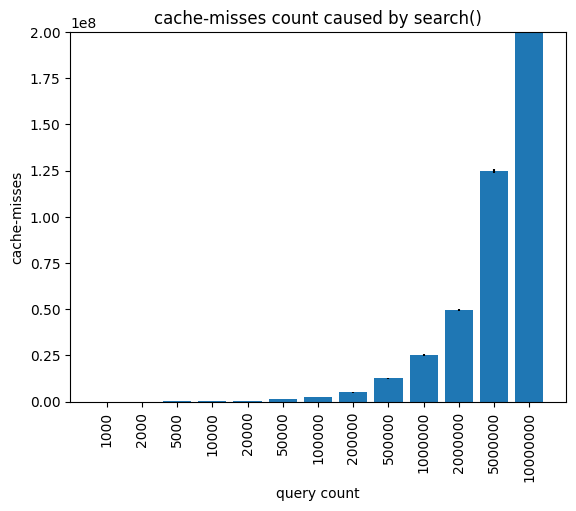

In [143]:
plot(df_full_2000000, 'search_misses', 'cache-misses count caused by search()', 'query count', 'cache-misses')